# Es 1

In [214]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

**(1)**
* How many records are available?
* Are there missing values?
* How many elements does each class contain?

In [3]:
X.shape
print(f'There are {X.shape[0]} rows')

There are 178 rows


In [4]:
if np.isnan(X).any():
    print('There are some missing values')
else:
    print('There are not missing values')   

There are not missing values


In [5]:
sy = pd.Series(y)
sy.value_counts()

1    71
0    59
2    48
dtype: int64

**(3)**

After you successfully plotted a tree, you can take a closer look at the result and draw some conclusions. In particular, what information is contained in each node? Take a closer look at the leaf
nodes. Based on what you know about overfitting, what can you learn from these nodes?

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [7]:
from sklearn.tree import export_graphviz
dot_code = export_graphviz(clf, feature_names=feature_names)

![title](DecTree.jpg)

 We can immediately notice that some of the nodes are "taking decisions" (i.e. they are splitting) based on very small portions of the training dataset. For example, the split for flavanoids <= 1.58 separates 39 elements belonging to class "2" from a single element belonging to class "1". Now, this might be a meaningful split. It is more likely, though, that the tree is only adding a split there because "we asked it to" (i.e. the tree only stops when it reaches pure nodes). Most likely, the split added there is only useful to separate that very specific point from class "1" to those specific 39 points in class "2", and can unlikely be generalized to new data. This is a good example of what overfitting is. If we were to stop the construction of the tree one step earlier (i.e. at the node with [0,1,39]) and assign the majority label ("2") to all points reaching that node, we would probably do a better job at generalizing new points.

**(4)**

Given the dataset X, you can get the predictions of the classifier (one for each entry in X) by calling
the predict() of DecisionTreeClassifier. Then, use the accuracy_score() function (which you
can import from sklearn.metrics) to compute the accuracy between two lists of values (y_true,
the list of “correct” labels, and y_pred, the list of predictions made by the classifier). Since you
already have both these lists (y for the ground truth, and the result of the predict() method for the
prediction), you can already compute the accuracy of your classifier. What result do you get? Does
this result seem particularly high/low? Why do you think that is?

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y, clf.predict(X))

1.0

**(5)** 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**(6)**

In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

**Remember:**
* Accuracy: % of correct samples
* Precision(c): % of correct samples among those predicted
with class c
* Recall(c): % of correct samples among those that belong
to class c in ground truth
* $F_1$ score(c): harmonic mean between precision and recall

In [12]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.78      1.00      0.88         7
           2       1.00      0.87      0.93        15

    accuracy                           0.92        36
   macro avg       0.90      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36

[[13  1  0]
 [ 0  7  0]
 [ 1  1 13]]


**(7)**

In [13]:
from sklearn.model_selection import ParameterGrid
params = {
    "max_depth": [None, 2, 3, 4, 5],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0, .01, .03, .07, .09, .11]
    }
accuracies = []
for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

print('Max accuracy:', max(accuracies))
print('Parameters with highest accuracy:')
ParameterGrid(params)[np.argmax(accuracies)]

Max accuracy: 0.9444444444444444
Parameters with highest accuracy:


{'splitter': 'best', 'min_impurity_decrease': 0, 'max_depth': None}

**(8)**

In [14]:
from sklearn.model_selection import KFold, cross_val_predict
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split

accuracies = []
for config in ParameterGrid(params):
    clf_accuracies = []
    counts = []
    for train_indices, valid_indices in kf.split(X_train_valid):
        X_train = X_train_valid[train_indices]
        y_train = y_train_valid[train_indices]
        X_valid = X_train_valid[valid_indices]
        y_valid = y_train_valid[valid_indices]
        
        counts.append(len(train_indices))
        
        clf = DecisionTreeClassifier(**config)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_valid, clf.predict(X_valid))
        clf_accuracies.append(acc)
    accuracies.append(np.average(clf_accuracies, weights=counts))

In [15]:
best_config = list(ParameterGrid(params))[np.argmax(accuracies)]
clf = DecisionTreeClassifier(**best_config)
clf.fit(X_train_valid, y_train_valid)
accuracy_score(y_test, clf.predict(X_test))

0.9722222222222222

# Es 2

In [16]:
df = pd.read_csv('2d-synthetic.csv', sep=',')

In [17]:
df

,x0,x1,label
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0
...,...,...,...
495,4.995458,8.437083,0
496,6.636632,9.931535,0
497,6.373259,8.098388,0
498,1.230331,7.169844,1


0    259
1    241
Name: label, dtype: int64


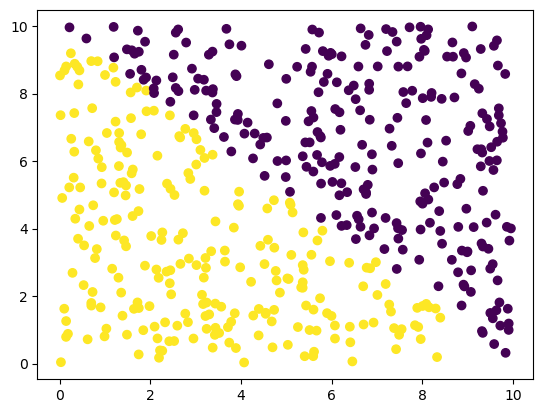

In [18]:
x0 = df['x0'].values
x1 = df['x1'].values
colors = df['label'].values
plt.scatter(x0, x1 , c = colors)
print(df['label'].value_counts())
plt.show()

In [99]:
X = df.loc[:,['x0','x1']]
y = df['label']
featLabels = ['x0', 'x1']
type(X)

pandas.core.frame.DataFrame

In [100]:
clf2 = DecisionTreeClassifier()
clf2.fit(X, y)

DecisionTreeClassifier()

In [21]:
dot_code = export_graphviz(clf2, feature_names = featLabels)
print(dot_code)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x0 <= 5.409\ngini = 0.499\nsamples = 500\nvalue = [259, 241]"] ;
1 [label="x1 <= 6.674\ngini = 0.378\nsamples = 265\nvalue = [67, 198]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x1 <= 5.518\ngini = 0.097\nsamples = 176\nvalue = [9, 167]"] ;
1 -> 2 ;
3 [label="x0 <= 5.076\ngini = 0.013\nsamples = 148\nvalue = [1, 147]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 136\nvalue = [0, 136]"] ;
3 -> 4 ;
5 [label="x0 <= 5.084\ngini = 0.153\nsamples = 12\nvalue = [1, 11]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11]"] ;
5 -> 7 ;
8 [label="x0 <= 3.577\ngini = 0.408\nsamples = 28\nvalue = [8, 20]"] ;
2 -> 8 ;
9 [label="gini = 0.0\nsamples = 20\nvalue = [0, 20]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 8\nvalue = [8, 0]"] ;
8 -> 10 ;
11 [label="x0 <= 1.58\ngini = 0.454\nsamples = 89\nval

### Ex 3

In [121]:
from sklearn.datasets import fetch_openml

dfM = fetch_openml('mnist_784')

In [122]:
X = dfM["data"]
y = dfM["target"]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 10000)

In [147]:
type(X_train)

pandas.core.frame.DataFrame

In [148]:
clfM = DecisionTreeClassifier()
clfM.fit(X_train, y_train)
accuracy_score(y_test, clfM.predict(X_test))

0.8781

In [126]:
type(clfM.predict(X_test))

numpy.ndarray

In [196]:
from scipy.stats import mode
class MyRandomForestClassifier():
    def __init__(self, n_estimators, max_features):
        self.n_estimators = n_estimators
        self.max_features = max_features 
        self.trees = []
        for i in range(n_estimators):
            self.trees.append(DecisionTreeClassifier(max_features = self.max_features))
    
    # train the trees of this random forest using subsets of X (and y)
    def fit(self, X, y):
        indexes = np.random.choice(range(len(X)), size = len(X), replace=True)
        
        for singleTree in self.trees:
            indexes = np.random.choice(range(len(X)), size = len(X), replace=True)
            X_tree = X.iloc[indexes]
            y_tree = y.iloc[indexes]
            singleTree.fit(X_tree, y_tree, )
    
    
    # predict the label for each point in X
    def predict(self, X):
        y_preds = []
        for singleTree in self.trees:
            y_preds.append(singleTree.predict(X))
        y_predsDf = pd.DataFrame(y_preds)
        return  y_predsDf.mode(axis=0).iloc[0]
    
    

In [197]:
frClf = MyRandomForestClassifier(n_estimators = 15, max_features = 28)

In [198]:
frClf.fit(X_train, y_train)

In [199]:
accuracy_score(y_test, frClf.predict(X_test))

0.955

In [201]:
df = pd.DataFrame([('bird', 2, 2),
                   ('mammal', 4, np.nan),
                   ('arthropod', 8, 0),
                   ('bird', 2, np.nan)],
                  index=('falcon', 'horse', 'spider', 'ostrich'),
                  columns=('species', 'legs', 'wings'))
df

,species,legs,wings
falcon,bird,2,2.0
horse,mammal,4,NaN
spider,arthropod,8,0.0
ostrich,bird,2,NaN


In [218]:
for range(10, 100, 10)


range(10, 100, 10)

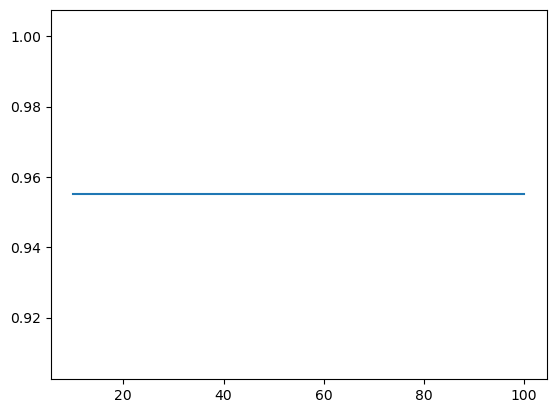

In [221]:
acc = []
for i in range(10, 110, 10):
    rfClf = MyRandomForestClassifier(n_estimators = i, max_features = 28)
    rfClf.fit(X_train, y_train)
    print(i, accuracy_score(y_test, rfClf.predict(X_test)))
    acc.append(accuracy_score(y_test, rfClf.predict(X_test)))

plt.plot(range(10, 110, 10), acc)
plt.show()

**5)**

In [224]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt')

In [225]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [227]:
accuracy_score(y_test, rf.predict(X_test))

0.9482

In [228]:
accs = []
for n_estimators in range(10, 101, 10):
    clf = RandomForestClassifier(n_estimators, max_features='sqrt')
    clf.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, clf.predict(X_test)))
    print(n_estimators, accuracy_score(y_test, clf.predict(X_test)))

10 0.9454
20 0.9589
30 0.9638
40 0.9643
50 0.9666
60 0.9673
70 0.9675
80 0.9674
90 0.9673
100 0.9682


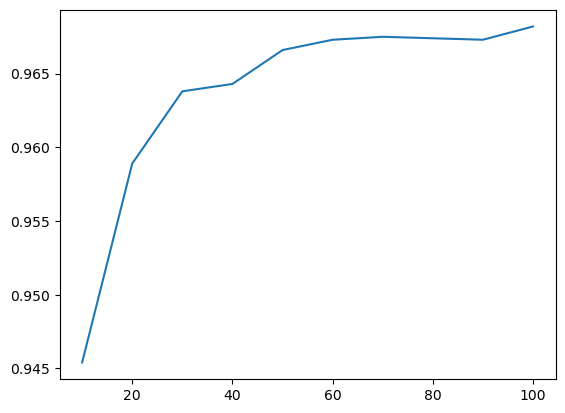

In [229]:
plt.plot(range(10, 101, 10), accs)
plt.show()

**6)**

In [237]:
importances = clf.feature_importances_
np.argmax(importances)

350

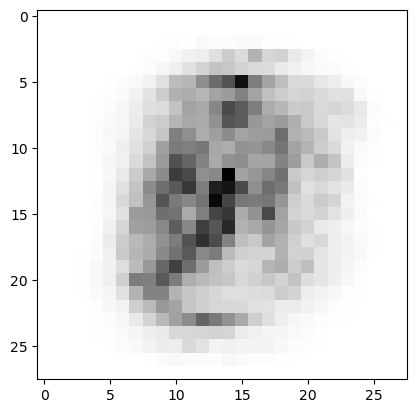

In [243]:
plt.imshow(clf.feature_importances_.reshape(28,28), cmap='binary')
plt.show()